In [1]:
import numpy as np
import pandas as pd
import warnings


In [2]:
warnings.filterwarnings('ignore')

# Get the dataset

In [3]:
columns_names=["user_id","item_id","rating","timestamp"]
df=pd.read_csv("ml-100k/u.data",sep='\t',names=columns_names)

In [4]:
df.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [5]:
df.shape


(100000, 4)

In [6]:
df['user_id'].nunique()

943

In [7]:
df['item_id'].nunique()

1682

In [8]:
# we are just concerned about first two columns movie id and title
movies_titles=pd.read_csv("ml-100k/u.item",sep='\|',header=None)

In [9]:
movies_titles.shape

(1682, 24)

In [10]:
movies_titles = movies_titles[[0,1]]

In [11]:
movies_titles.columns=['item_id','title']

In [12]:
movies_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [13]:
df=pd.merge(df,movies_titles,on="item_id")

In [14]:
df.tail()

,user_id,item_id,rating,timestamp,title
99995,840,1674,4,891211682,Mamma Roma (1962)
99996,655,1640,3,888474646,"Eighth Day, The (1996)"
99997,655,1637,3,888984255,Girls Town (1996)
99998,655,1630,3,887428735,"Silence of the Palace, The (Saimt el Qusur) (1..."
99999,655,1641,3,887427810,Dadetown (1995)


# Exploratory Data Analysis

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
# average rating of the movies by mean
df.groupby('title').mean()['rating'].sort_values(ascending=False)

title
Marlene Dietrich: Shadow and Light (1996)       5.0
Prefontaine (1997)                              5.0
Santa with Muscles (1996)                       5.0
Star Kid (1997)                                 5.0
Someone Else's America (1995)                   5.0
                                               ... 
Touki Bouki (Journey of the Hyena) (1973)       1.0
JLG/JLG - autoportrait de décembre (1994)       1.0
Daens (1992)                                    1.0
Butterfly Kiss (1995)                           1.0
Eye of Vichy, The (Oeil de Vichy, L') (1993)    1.0
Name: rating, Length: 1664, dtype: float64

In [17]:
df.groupby('title').count()['rating'].sort_values(ascending=False)

title
Star Wars (1977)                              583
Contact (1997)                                509
Fargo (1996)                                  508
Return of the Jedi (1983)                     507
Liar Liar (1997)                              485
                                             ... 
Man from Down Under, The (1943)                 1
Marlene Dietrich: Shadow and Light (1996)       1
Mat' i syn (1997)                               1
Mille bolle blu (1993)                          1
Á köldum klaka (Cold Fever) (1994)              1
Name: rating, Length: 1664, dtype: int64

In [18]:
ratings=pd.DataFrame(df.groupby('title').mean()['rating'])

In [19]:
ratings.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [20]:
# we can only recommend that movie which has been watched by various users and has got high average rating
ratings['num of ratings']=pd.DataFrame(df.groupby('title').count()['rating'])

In [21]:
ratings.sort_values(by='rating',ascending=False)

,rating,num of ratings
title,,
They Made Me a Criminal (1939),5.0,1
Marlene Dietrich: Shadow and Light (1996),5.0,1
"Saint of Fort Washington, The (1993)",5.0,2
Someone Else's America (1995),5.0,1
Star Kid (1997),5.0,3
...,...,...
"Eye of Vichy, The (Oeil de Vichy, L') (1993)",1.0,1
King of New York (1990),1.0,1
Touki Bouki (Journey of the Hyena) (1973),1.0,1


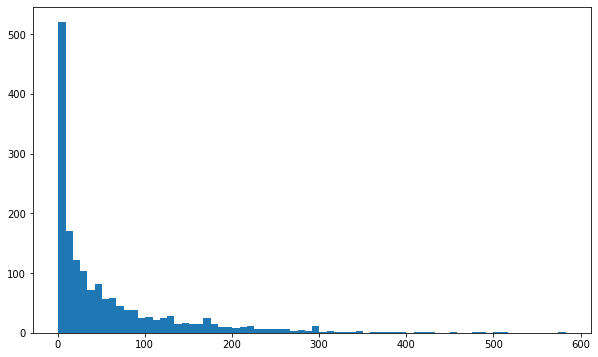

In [22]:
# x axis contains no of ratings y contains no of movies
plt.figure(figsize=(10,6))
plt.hist(ratings['num of ratings'],bins=70)
plt.show()

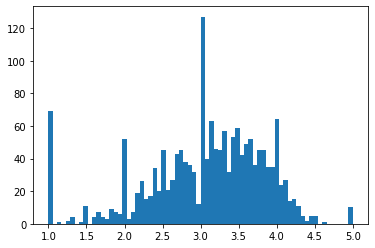

In [23]:

plt.hist(ratings['rating'],bins=70)
plt.show()

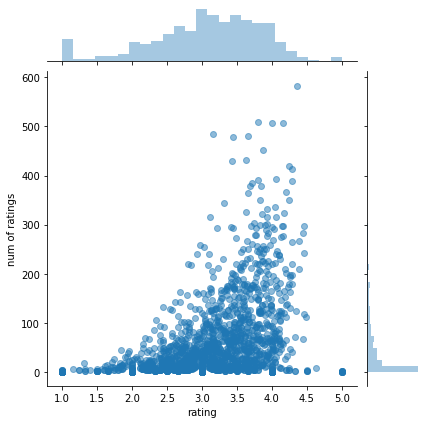

In [24]:
sns.jointplot(x='rating',y='num of ratings',data=ratings,alpha=0.5)

# creating the recommendation system

In [25]:
df.head()

,user_id,item_id,rating,timestamp,title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


In [26]:
# creating a matrix which has index value has user id and column name as movie title to see which user has given what rating to a particular movie 
moviemat=df.pivot_table(index="user_id",columns="title",values="rating")

In [27]:
ratings.sort_values('num of ratings',ascending=False).head

<bound method NDFrame.head of                                       rating  num of ratings
title                                                       
Star Wars (1977)                    4.358491             583
Contact (1997)                      3.803536             509
Fargo (1996)                        4.155512             508
Return of the Jedi (1983)           4.007890             507
Liar Liar (1997)                    3.156701             485
...                                      ...             ...
Great Day in Harlem, A (1994)       5.000000               1
Other Voices, Other Rooms (1997)    3.000000               1
Good Morning (1971)                 1.000000               1
Girls Town (1996)                   3.000000               1
Á köldum klaka (Cold Fever) (1994)  3.000000               1

[1664 rows x 2 columns]>

In [28]:
starwars_user_ratings=moviemat['Star Wars (1977)']

In [29]:
# how starwars is corelated with the other movies
similar_to_starwars=moviemat.corrwith(starwars_user_ratings)

In [30]:
corr_starwars=pd.DataFrame(similar_to_starwars,columns=['corelation'])

In [31]:
# this true will not craete a new object but will make changes in the old object only
corr_starwars.dropna(inplace=True)

In [32]:
corr_starwars

,corelation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398
...,...
Young Guns (1988),0.186377
Young Guns II (1990),0.228615
"Young Poisoner's Handbook, The (1995)",-0.007374


In [33]:
# if some user has rated starwars as 5* and hollow read as 5* then there is perfect corelation
corr_starwars.sort_values('corelation',ascending=False)

,corelation
title,
Hollow Reed (1996),1.0
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0
...,...
Roseanna's Grave (For Roseanna) (1997),-1.0
For Ever Mozart (1996),-1.0
American Dream (1990),-1.0


In [34]:
# only consider those movie which as no of ratings >100
corr_starwars=corr_starwars.join(ratings['num of ratings'])

In [35]:
corr_starwars[corr_starwars['num of ratings']>100].sort_values('corelation',ascending=False)

,corelation,num of ratings
title,,
Star Wars (1977),1.000000,583
"Empire Strikes Back, The (1980)",0.747981,367
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130
...,...,...
"Edge, The (1997)",-0.127167,113
As Good As It Gets (1997),-0.130466,112
Crash (1996),-0.148507,128


# predict function

In [49]:
def predict_movies(movie_name):
    movie_user_ratings=moviemat[movie_name]
    similar_movie=moviemat.corrwith(movie_user_ratings)
    
    corr_movie=pd.DataFrame(similar_movie,columns=['corelation'])
    corr_movie.dropna(inplace=True)
    
    corr_movie=corr_movie.join(ratings['num of ratings'])
    predictions=corr_movie[corr_movie['num of ratings']>100].sort_values('corelation',ascending=False)
    
    return predictions
    

In [56]:
predictions= predict_movies("Hollow Reed (1996)")

In [57]:
predictions.head()


,corelation,num of ratings
title,,
"Ice Storm, The (1997)",1.0,108
Trainspotting (1996),1.0,250
Kingpin (1996),1.0,162
Rumble in the Bronx (1995),1.0,174
"Saint, The (1997)",1.0,316
